# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb


## Loading the dataset

In [2]:
file_url = './BankChurners.csv'
data_original = pd.read_csv(file_url, index_col='CLIENTNUM') # since the data dictionary indicated that CLIENTNUM is the unique identifier for the customer holding the account, we will use it as the index column. This saves us from having to drop it later.

In [3]:
df = data_original.copy()
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Overview

- Observations
- Sanity checks

In [4]:
df.shape

(10127, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [7]:
# for each column that is not numeric, print the column's unique values
for col in df.select_dtypes(exclude=np.number).columns:
    print(col, df[col].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' nan 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']


#### Observations so far:
- There are 10127 rows and 20 columns in the dataset.
- In the categorical columns, "Attrition_Flag" can be roughly transalted as "Active" and "Inactive" customers. Therefore, we can later make it as a binary (0 & 1) column.
- Education Level and Marital Status have NaN, which can be treated as missing or unknown data.
- For Income category, we need to address two things: the "abc" value, as well as the categories themselves. Let's first look at the "abc" value.

In [8]:
df[df["Income_Category"] == 'abc']

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
709327383,Existing Customer,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
718813833,Existing Customer,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
708300483,Attrited Customer,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
720572508,Existing Customer,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
711427458,Existing Customer,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711149133,Attrited Customer,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
714677583,Attrited Customer,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
718170033,Existing Customer,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000


Looks like many of them are with Blue card. Let's sanity-check by grouping the count by card category.

In [9]:
df[df["Income_Category"] == 'abc'].groupby("Card_Category")["Income_Category"].value_counts()

Card_Category  Income_Category
Blue           abc                1045
Gold           abc                   9
Platinum       abc                   5
Silver         abc                  53
Name: Income_Category, dtype: int64

Many of the income category that's "abc" are Blue card. Since blue card is the most basic tier (lowest tier), it seems like it would be the card that is issued with the least restrictions. In this case, perhaps the income was not gathered at the time of issue if credit score is good enough. Therefore, we can treat "abc" as "Unknown".

Let us be cautious and check Blue card's income category distribution.

In [10]:
df[df["Card_Category"] == 'Blue'].groupby("Income_Category")["Card_Category"].value_counts()

Income_Category  Card_Category
$120K +          Blue              645
$40K - $60K      Blue             1675
$60K - $80K      Blue             1273
$80K - $120K     Blue             1395
Less than $40K   Blue             3403
abc              Blue             1045
Name: Card_Category, dtype: int64

1045/10127 = 10.3% of the Blue card's income category is "abc". This is a significant portion, so we cannot simply drop the rows with "abc" income category. We will treat "abc" as "Unknown" for now.

Onto the second point: since the income category is ordinal, we can simply replace the categories with numbers. We may need a few experiments to do that. For now, let's replace it with median income for each category. Meaning:

* abc: NaN
* Less than $40K: 20K
* $40K - $60K: 50K
* $60K - $80K: 70K
* $80K - $120K: 100K
* $120K +: 120K

In [11]:
df["Income"] = df["Income_Category"].replace(
    {
        "abc": np.nan,
        "Less than $40K": 20000,
        "$40K - $60K": 50000,
        "$60K - $80K": 70000,
        "$80K - $120K": 100000,
        "$120K +": 120000,
    }
).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

We will deal with the NaN values after EDA.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariant Analysis

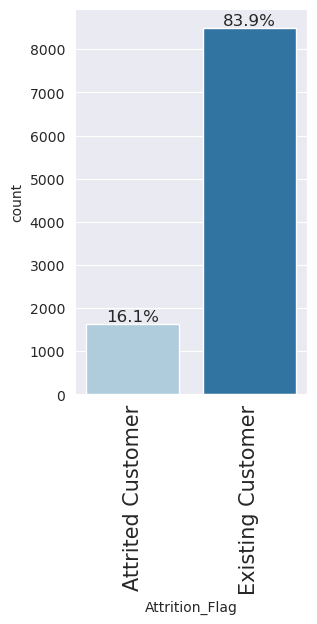

In [16]:
labeled_barplot(df, "Attrition_Flag", perc=True)

**Observations:**

- 16.1% of the customers have closed their account.
- This is the target variable that we need to predict.
- The data is highly imbalanced - we will need to either undersample or oversample the minority class to avoid bias in the model.

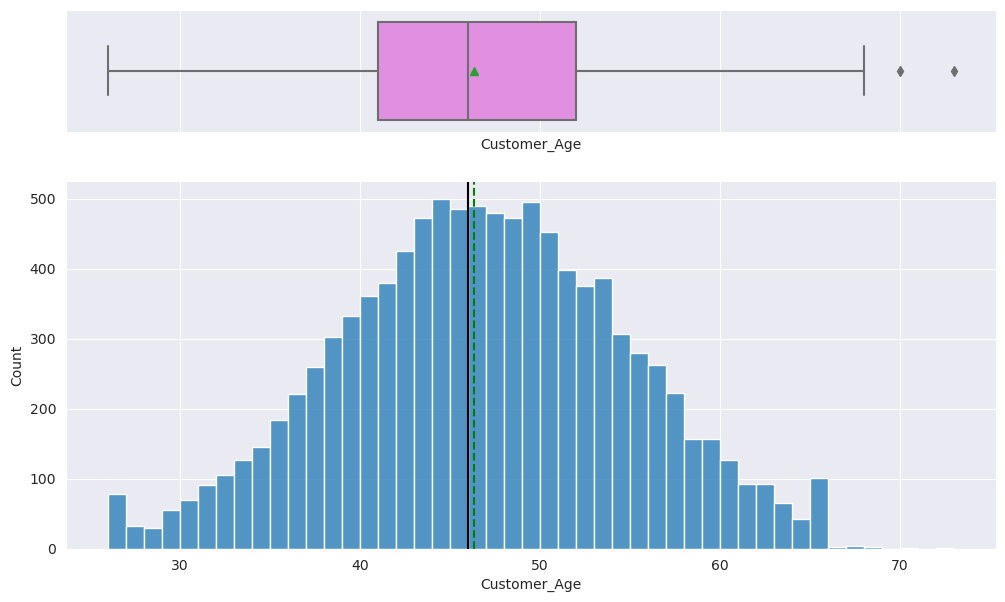

In [17]:
histogram_boxplot(df, "Customer_Age")

**Observations:**

- Customer age is normally distributed with a few outliers on the higher end.

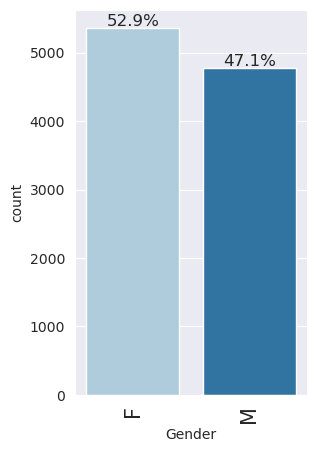

In [18]:
labeled_barplot(df, "Gender", perc=True)

**Observations:**

- Gender is almost equally distributed.

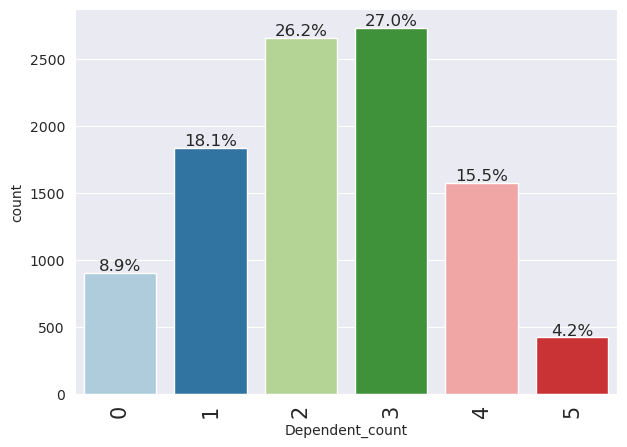

In [19]:
labeled_barplot(df, "Dependent_count", perc=True)

**Observations:**

- Most of the customers have 2 or 3 dependents.

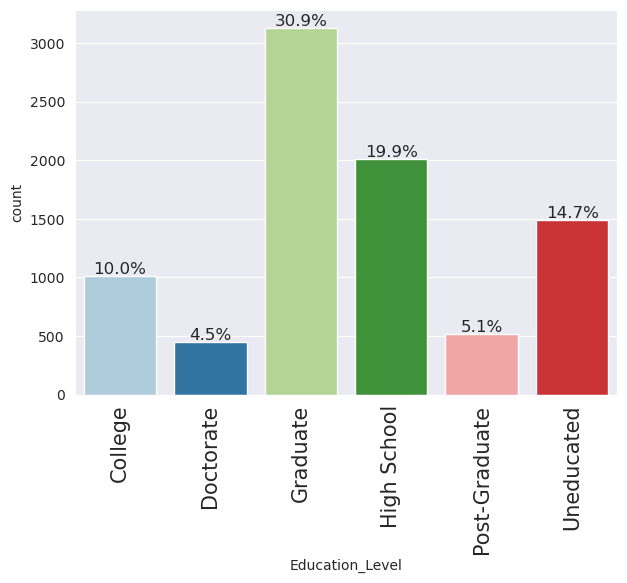

In [20]:
labeled_barplot(df, "Education_Level", perc=True)

**Observations:**

- Most of the customers are graduates.
- A good portion of the customers are uneducated.
- There are a few customers with unknown education level. We can replace the unknown education level with the mode of the column.

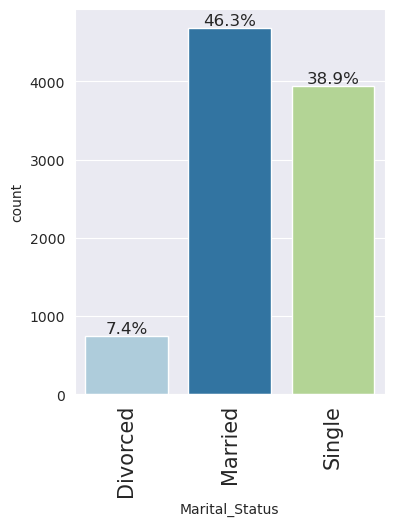

In [21]:
labeled_barplot(df, "Marital_Status", perc=True)

**Observations:**

- Most of the customers are married.
- There are a few customers with unknown marital status. We can replace the unknown marital status with the mode of the column.

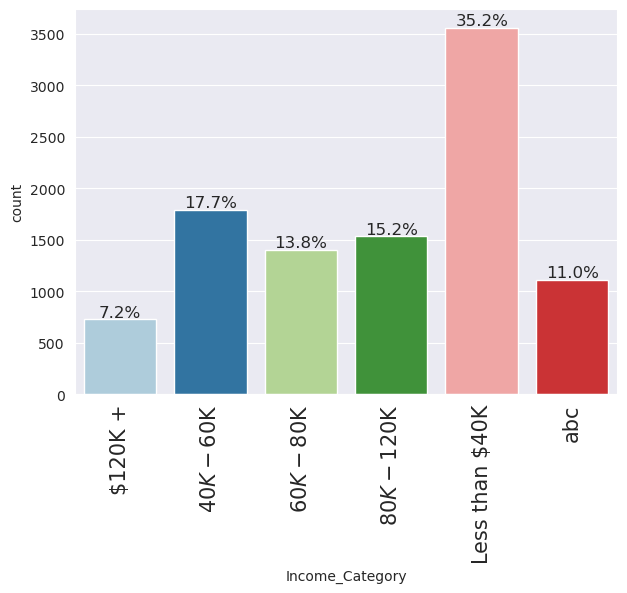

In [22]:
labeled_barplot(df, "Income_Category", perc=True)

**Observations:**

- 35.2% of the customers have an income of less than 40K.
- Implication: that means, a good 35.2% of customers do not have a good income. This could also impact the credit score and credit limit. On top of that, these customers may run into financial troubles more often than the rest of the customers.
- It would be natural to check the relationship between income category and attrition flag when we do multi-variate analysis.
- For the unknown ("abc") category, we need to be careful about replacing it with the mode of the column.
- Let's check the income as numeric value (as columnm "Income") as well. 

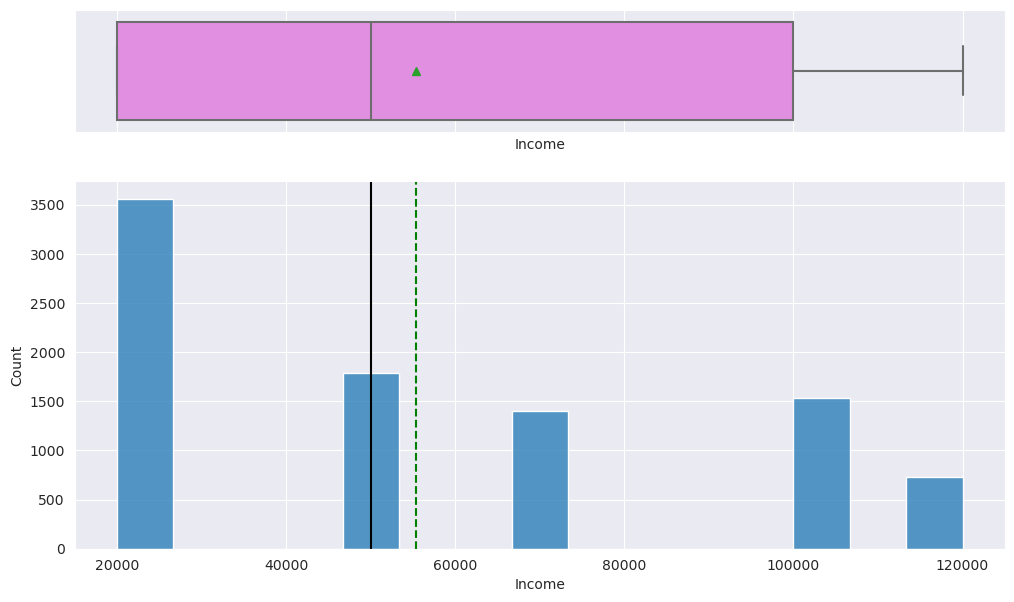

In [23]:
histogram_boxplot(df, "Income")

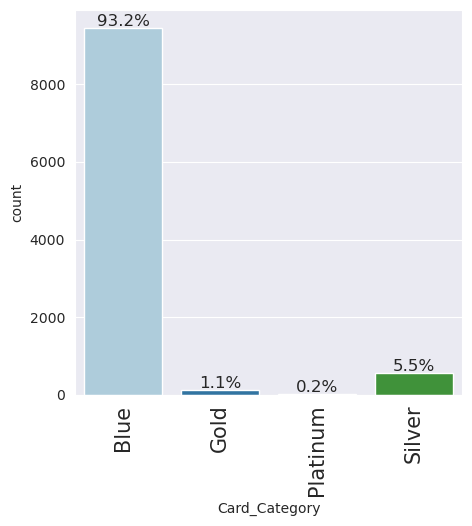

In [24]:
labeled_barplot(df, "Card_Category", perc=True)

**Observations:**

- Most of the customers have a blue card.
- It is very imbalanced.

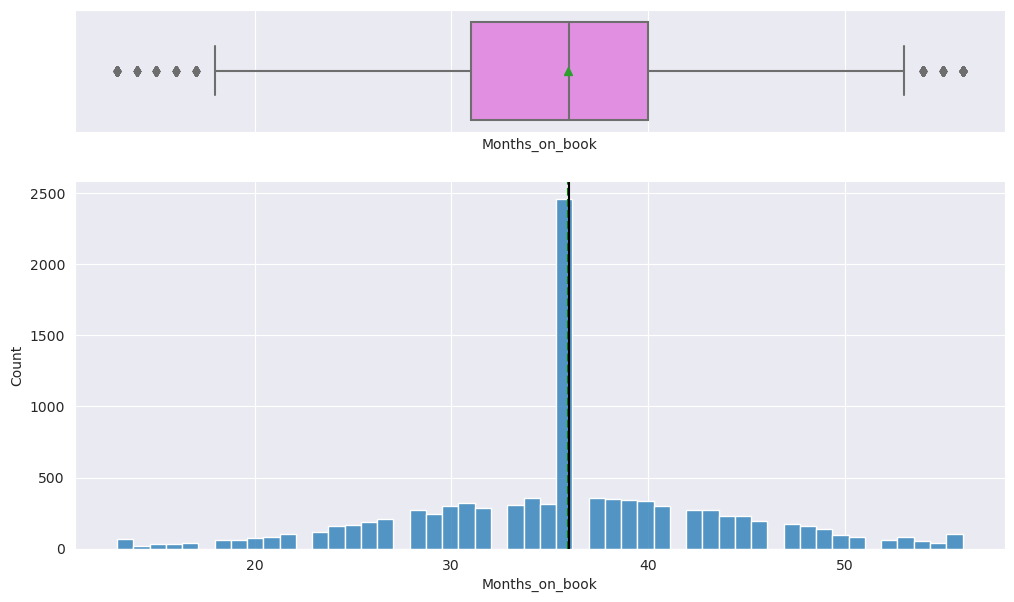

In [25]:
histogram_boxplot(df, "Months_on_book")

**Observations:**

- There is an abnormal spike at 36 months. Does that mean many of the customers joined in one single campaign?
- We may want to check this against other variables to see if there is any pattern.
- Otherwise it's normally distributed.

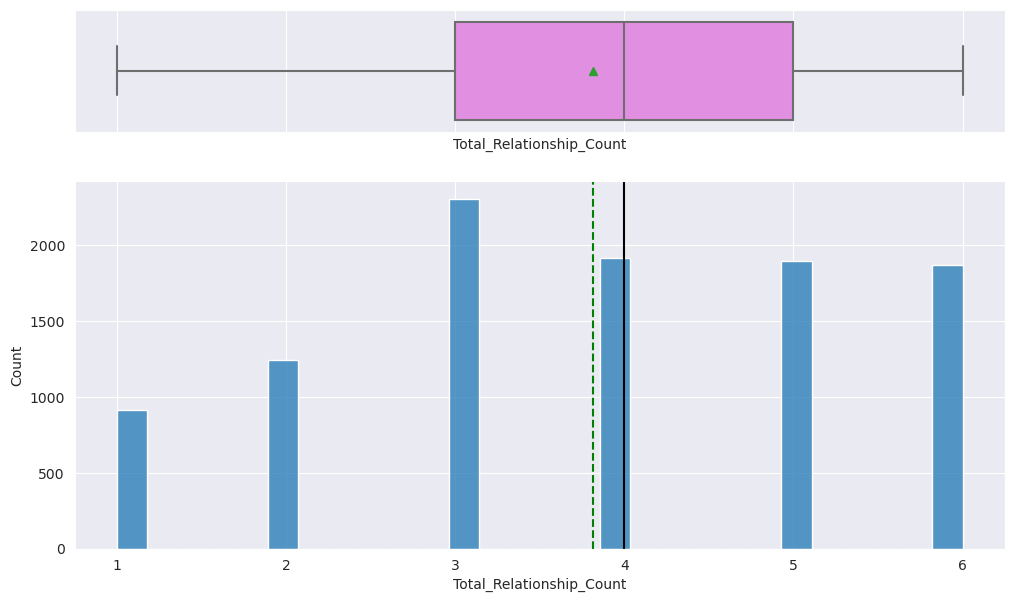

In [26]:
histogram_boxplot(df, "Total_Relationship_Count")

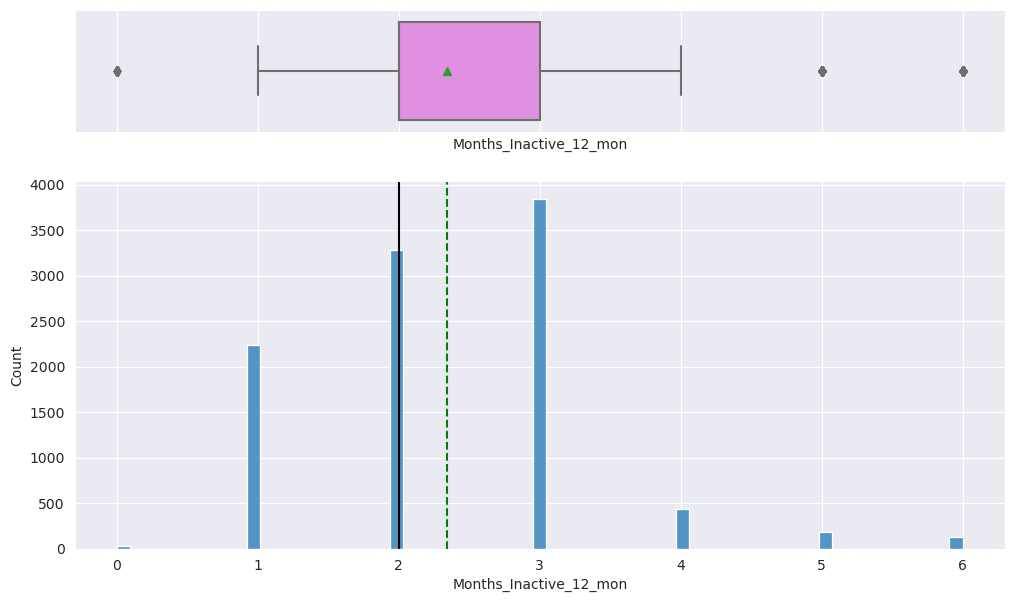

In [27]:
histogram_boxplot(df, "Months_Inactive_12_mon")

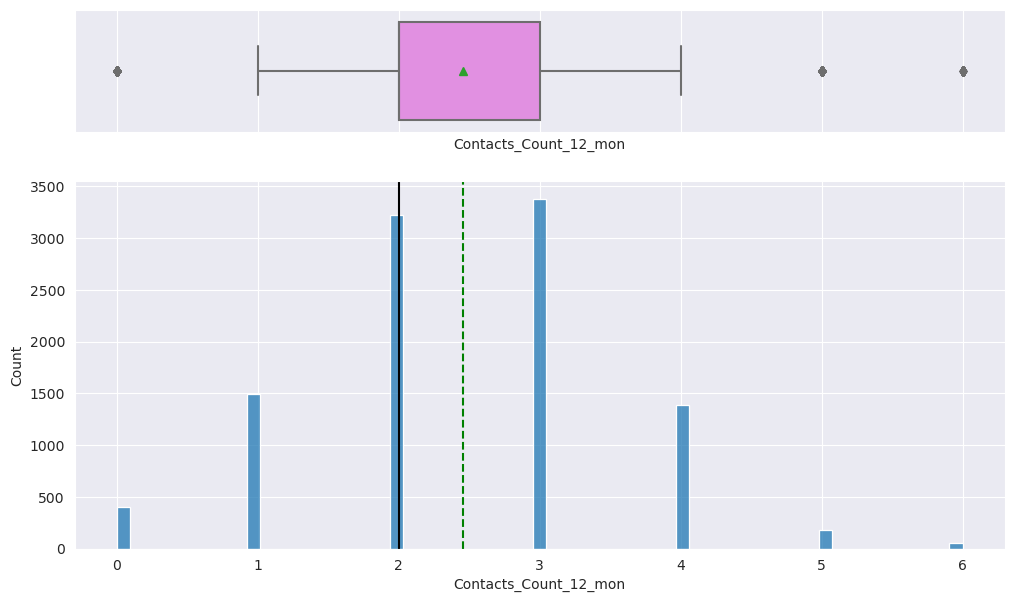

In [28]:
histogram_boxplot(df, "Contacts_Count_12_mon")

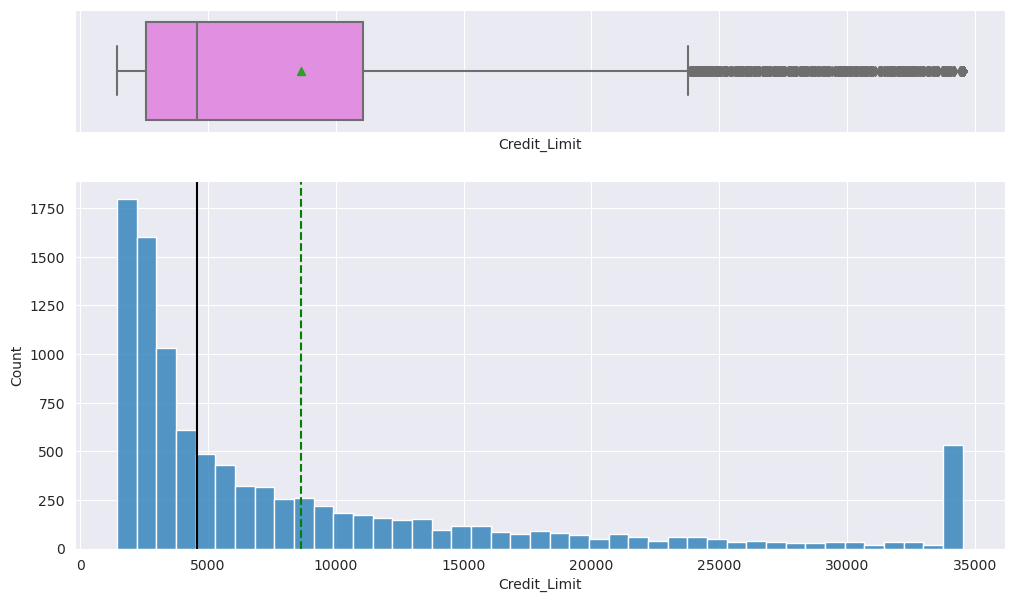

In [29]:
histogram_boxplot(df, "Credit_Limit")

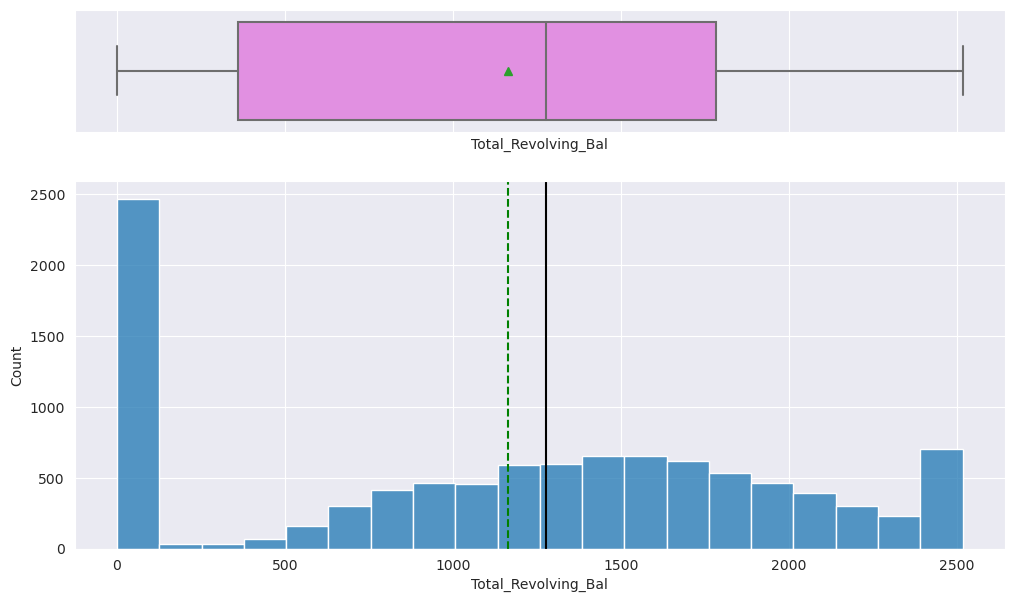

In [30]:
histogram_boxplot(df, "Total_Revolving_Bal")

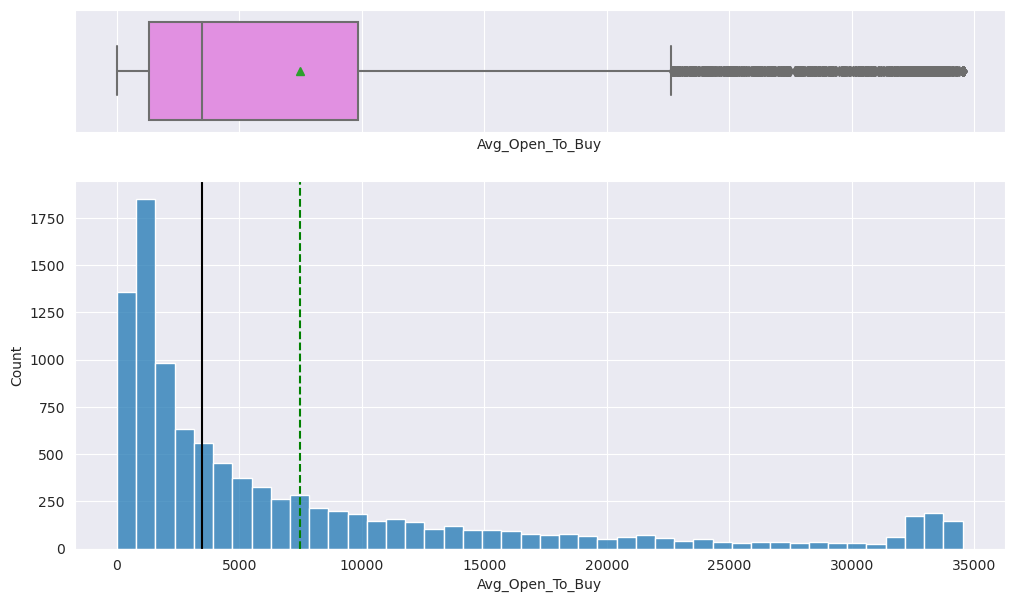

In [31]:
histogram_boxplot(df, "Avg_Open_To_Buy")

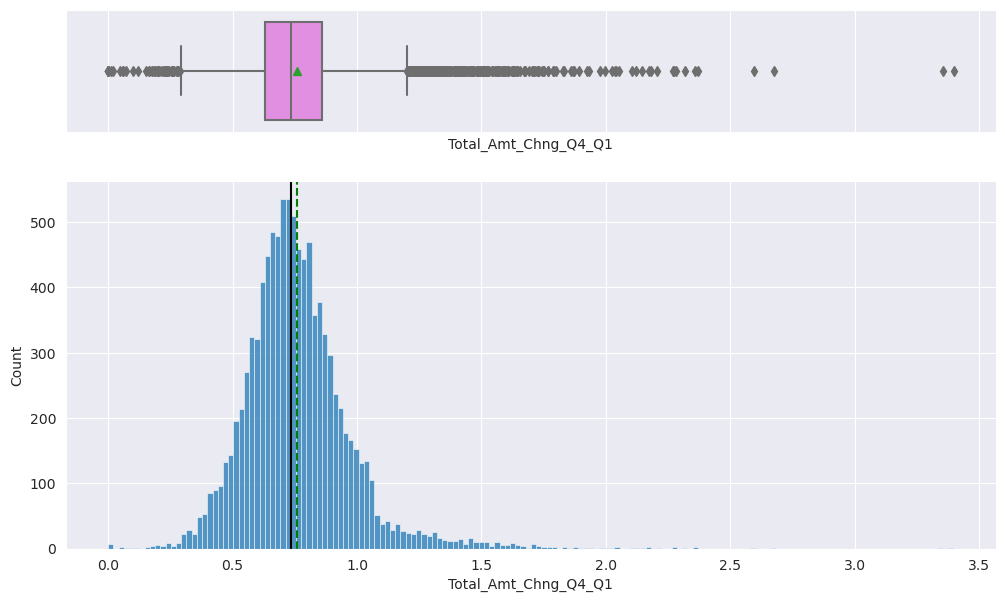

In [32]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

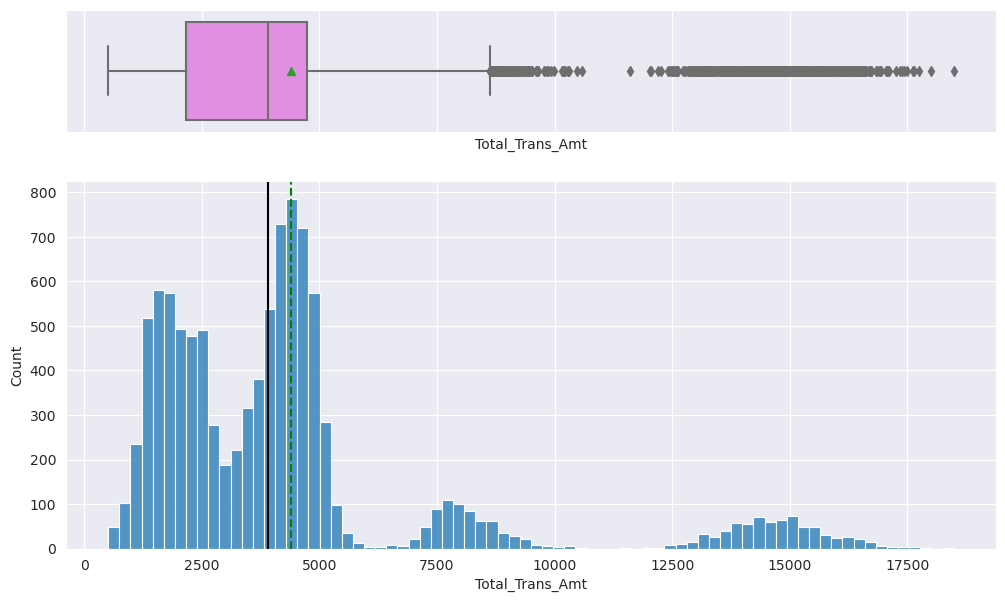

In [33]:
histogram_boxplot(df, "Total_Trans_Amt")

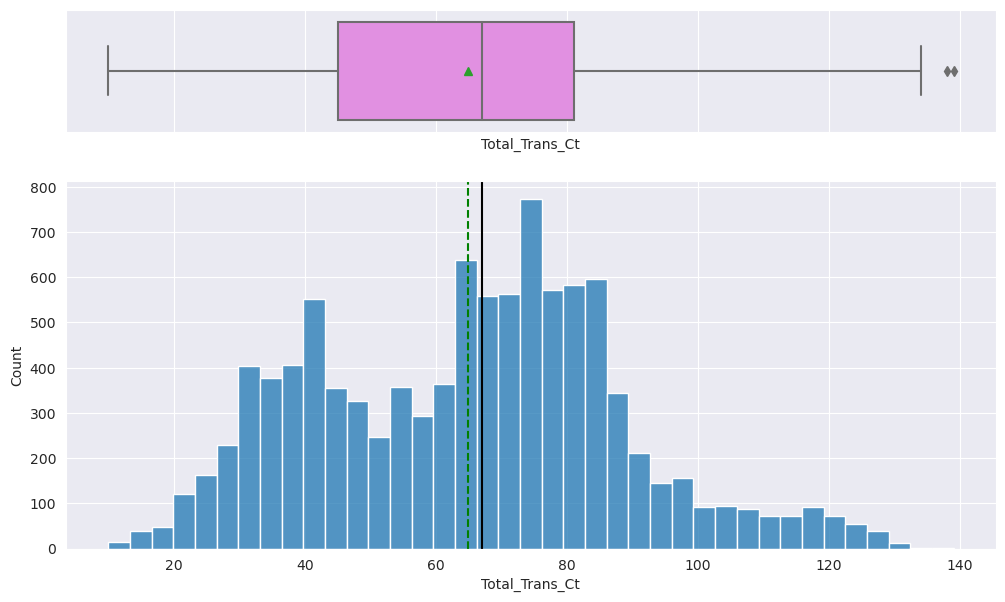

In [34]:
histogram_boxplot(df, "Total_Trans_Ct")

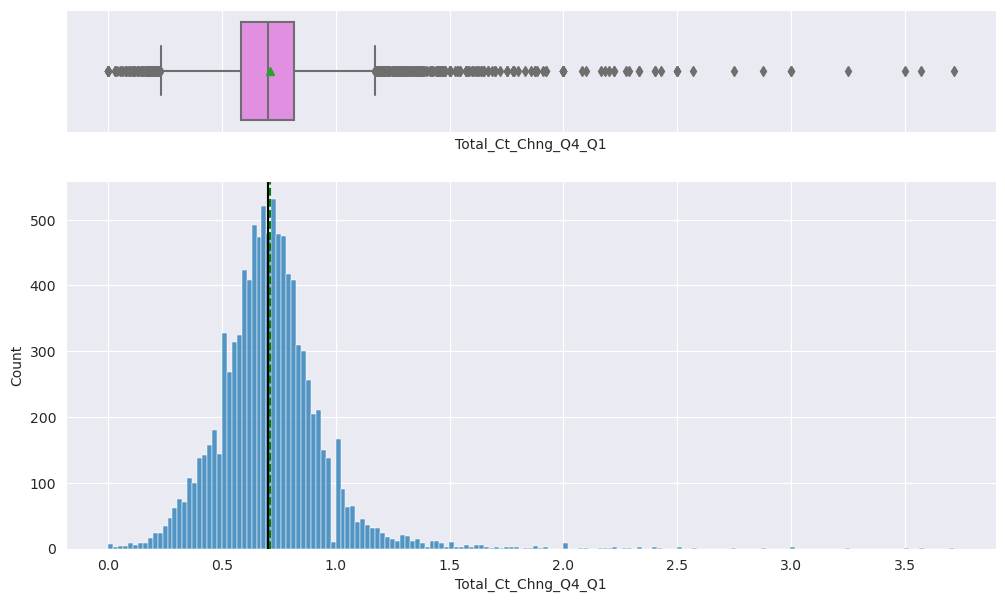

In [35]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

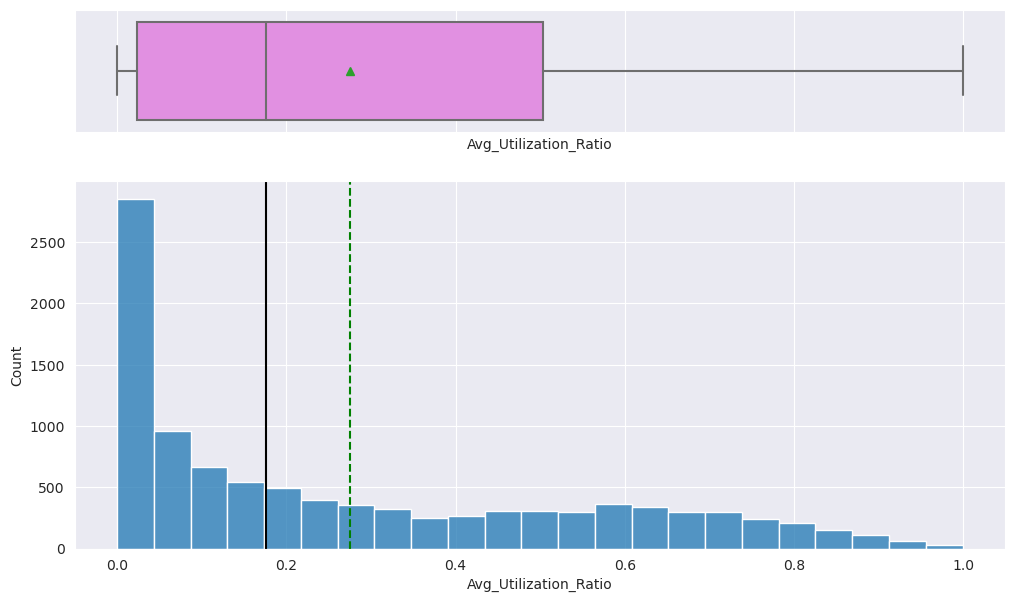

In [36]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

#### Multivariant Analysis

Heatmap

/tmp/ipykernel_12556/2815859694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


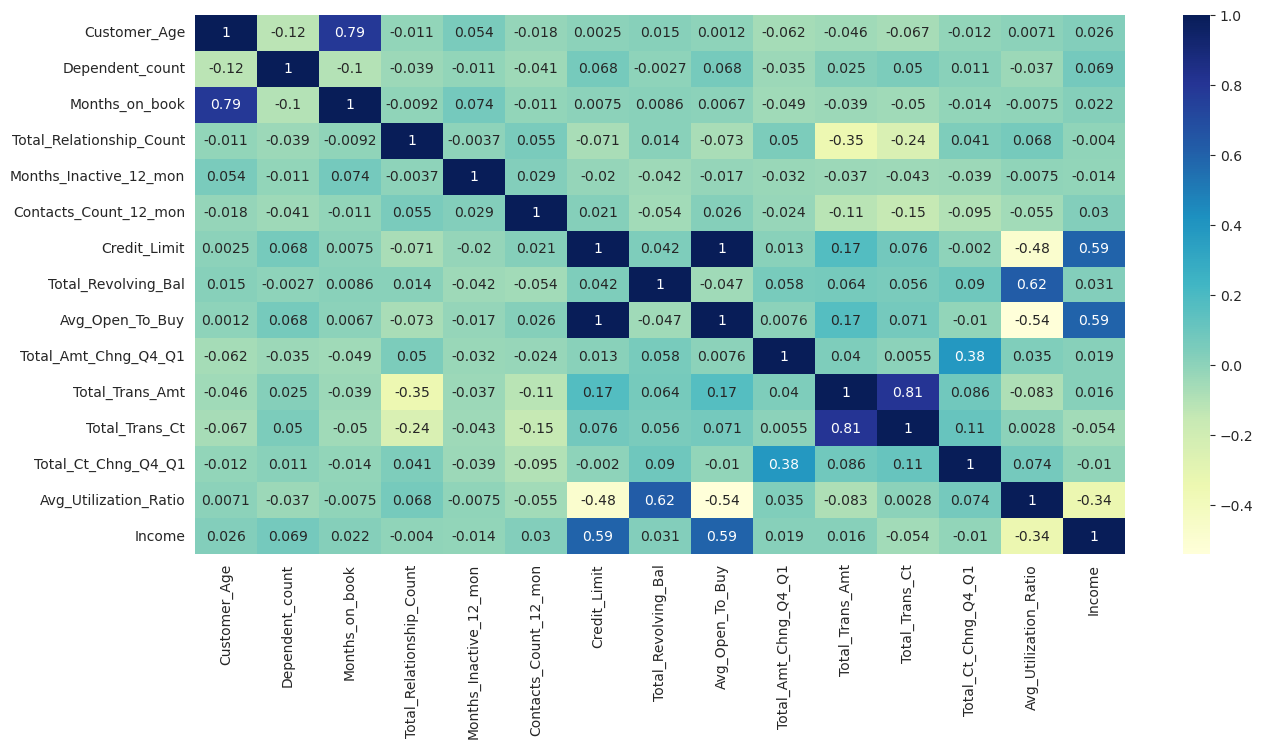

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Observations:**

- There are a few variables that are highly correlated with each other.
- Months on book and Customer age are highly correlated.
- Credit limit and Avg open to buy are highly correlated.
- Total transaction amount and Total transaction count are highly correlated.
- Total revolving balance and Avg utilization ratio are highly correlated.

Gender       F     M   All
Income                    
All       4298  4717  9015
100000.0     0  1535  1535
70000.0      0  1402  1402
50000.0   1014   776  1790
120000.0     0   727   727
20000.0   3284   277  3561
------------------------------------------------------------------------------------------------------------------------


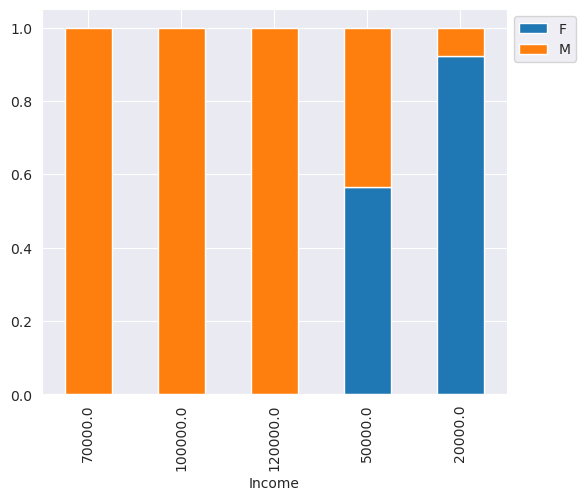

In [39]:
# stacked graph between Income and Gender
stacked_barplot(df, "Income", "Gender")

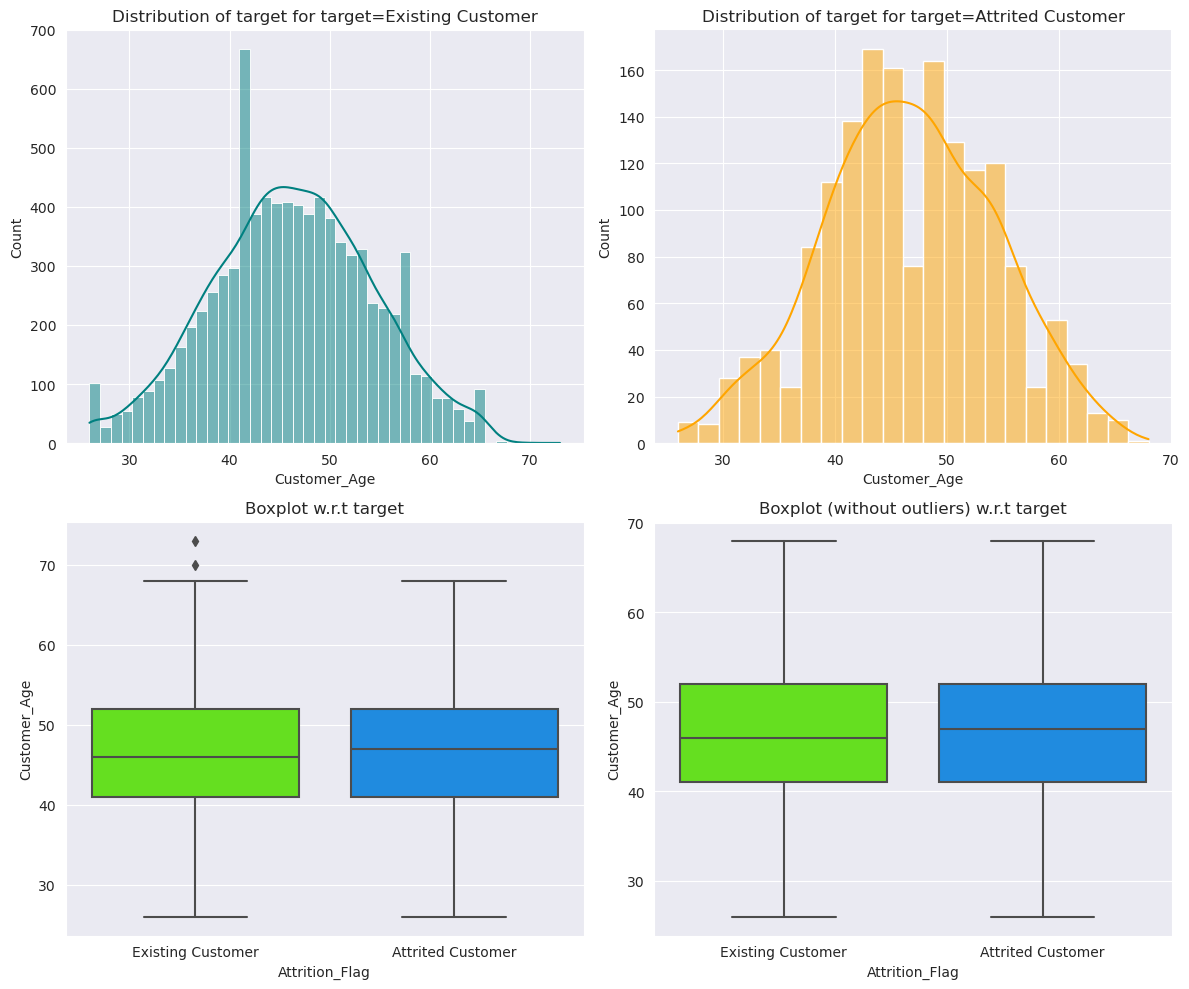

In [48]:
# visualize relationship between Attrition Flag and Customer Age
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


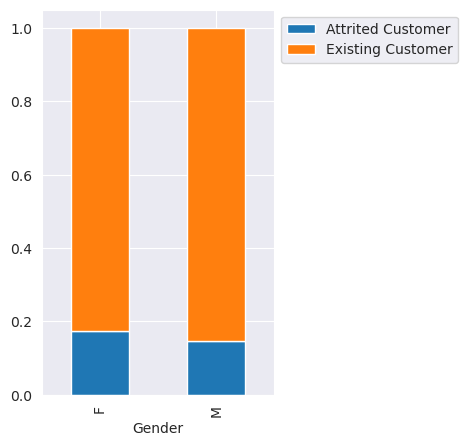

In [50]:
# visualize relationship between Attrition Flag and Gender
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


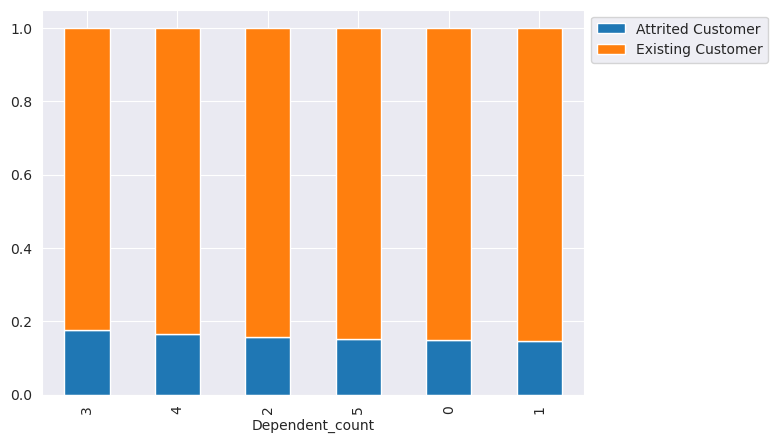

In [53]:
# visualize relationship between Attrition Flag and Dependent Count
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


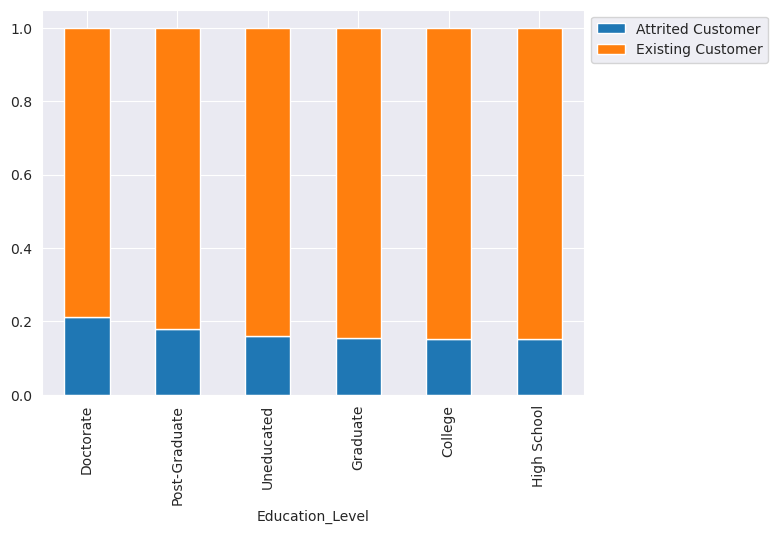

In [54]:
# visualize relationship between Attrition Flag and Education Level
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


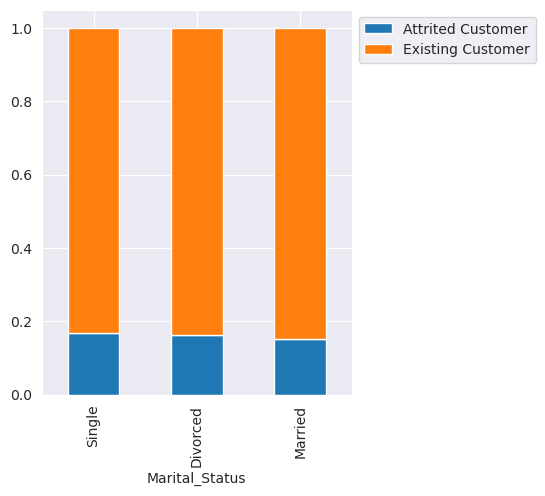

In [55]:
# visualize relationship between Attrition Flag and Marital Status
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


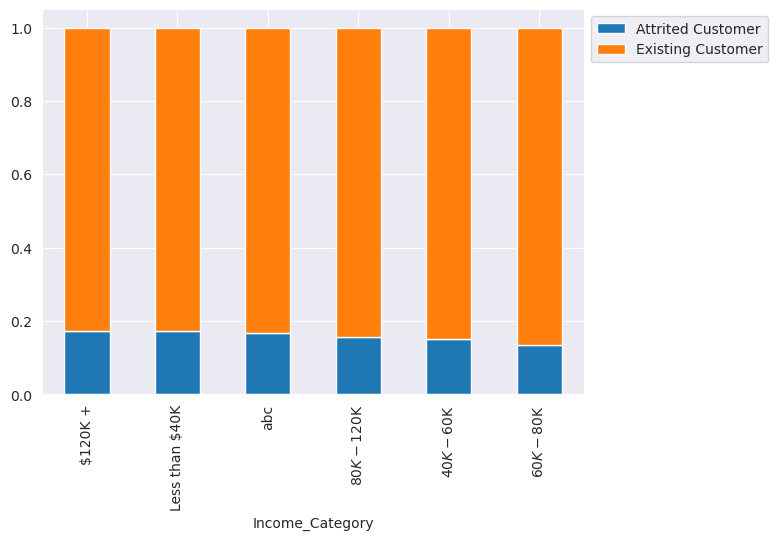

In [57]:
# visualize relationship between Attrition Flag and Income Category
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


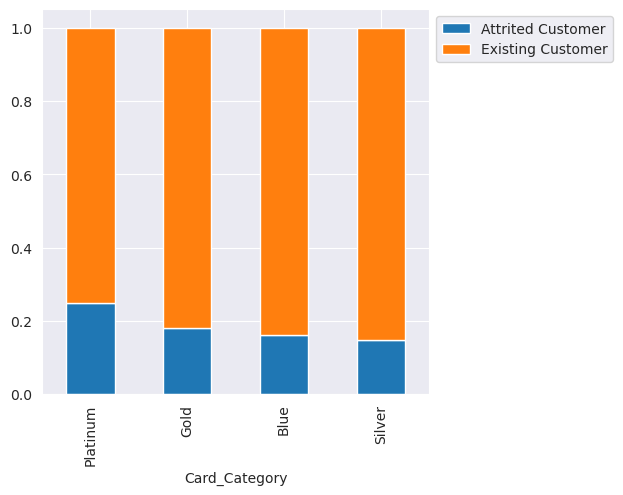

In [58]:
# visualize relationship between Attrition Flag and Card Category
stacked_barplot(df, "Card_Category", "Attrition_Flag")

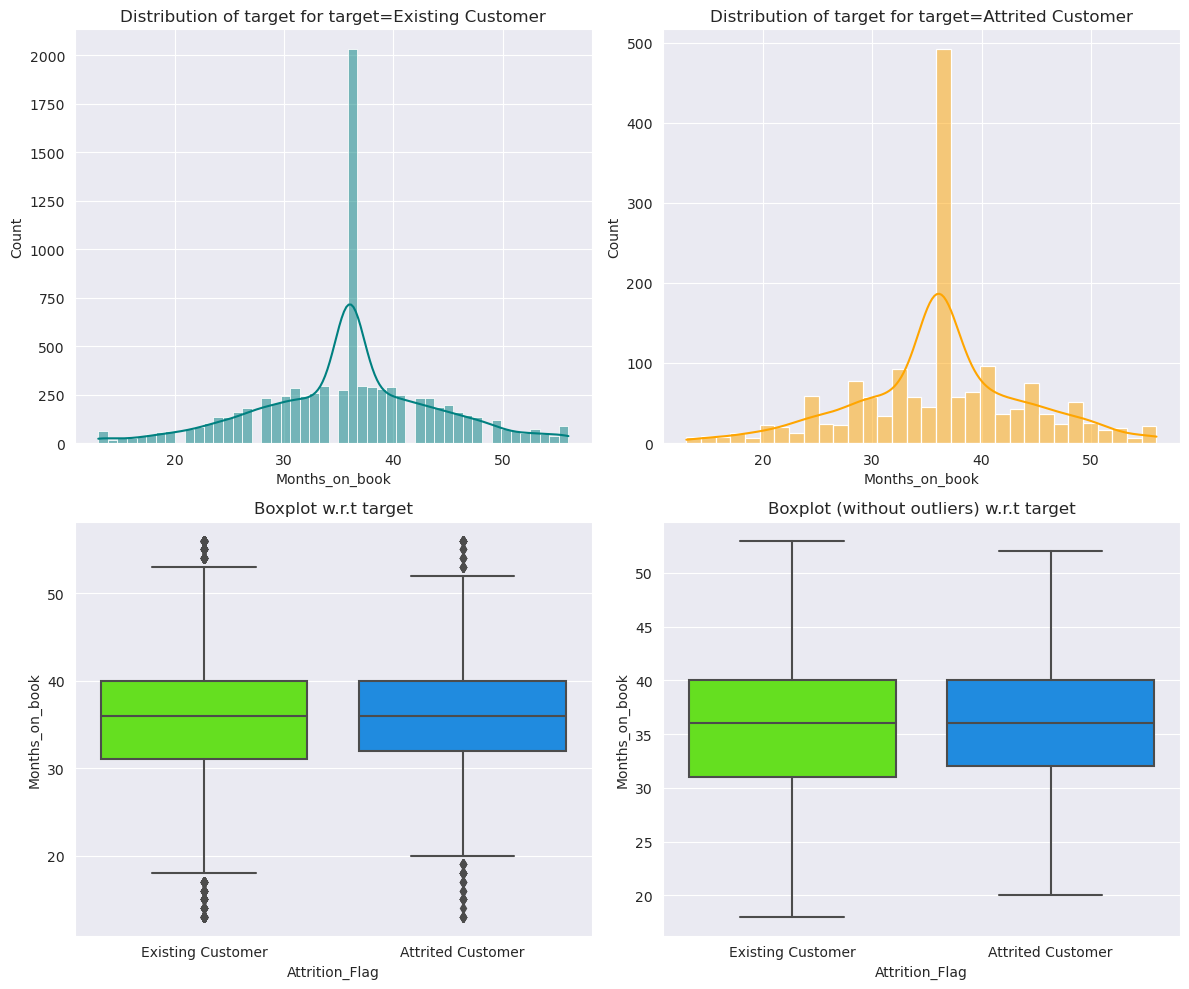

In [59]:
# visualize relationship between Attrition Flag and Months on Book
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


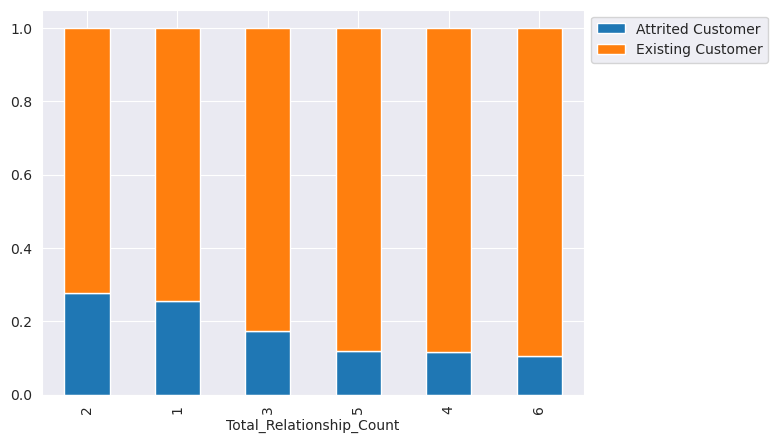

In [62]:
# visualize relationship between Attrition Flag and Total Relationship Count
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


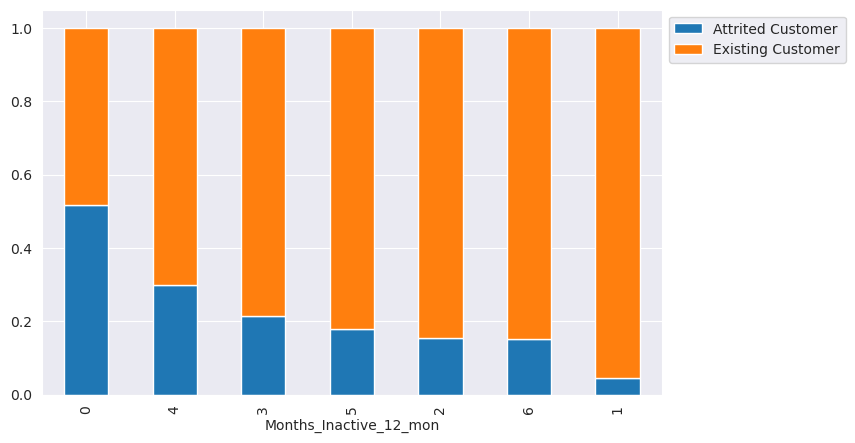

In [63]:
# visualize relationship between Attrition Flag and Months Inactive 12 mon
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


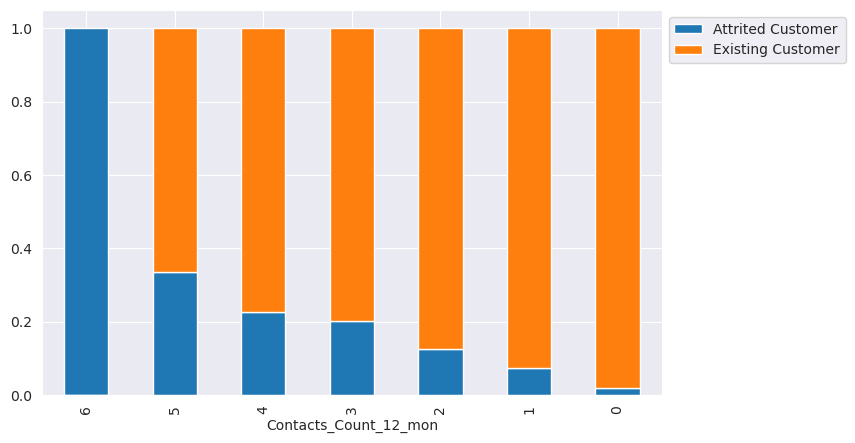

In [64]:
# visualize relationship between Attrition Flag and Contacts Count 12 mon
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

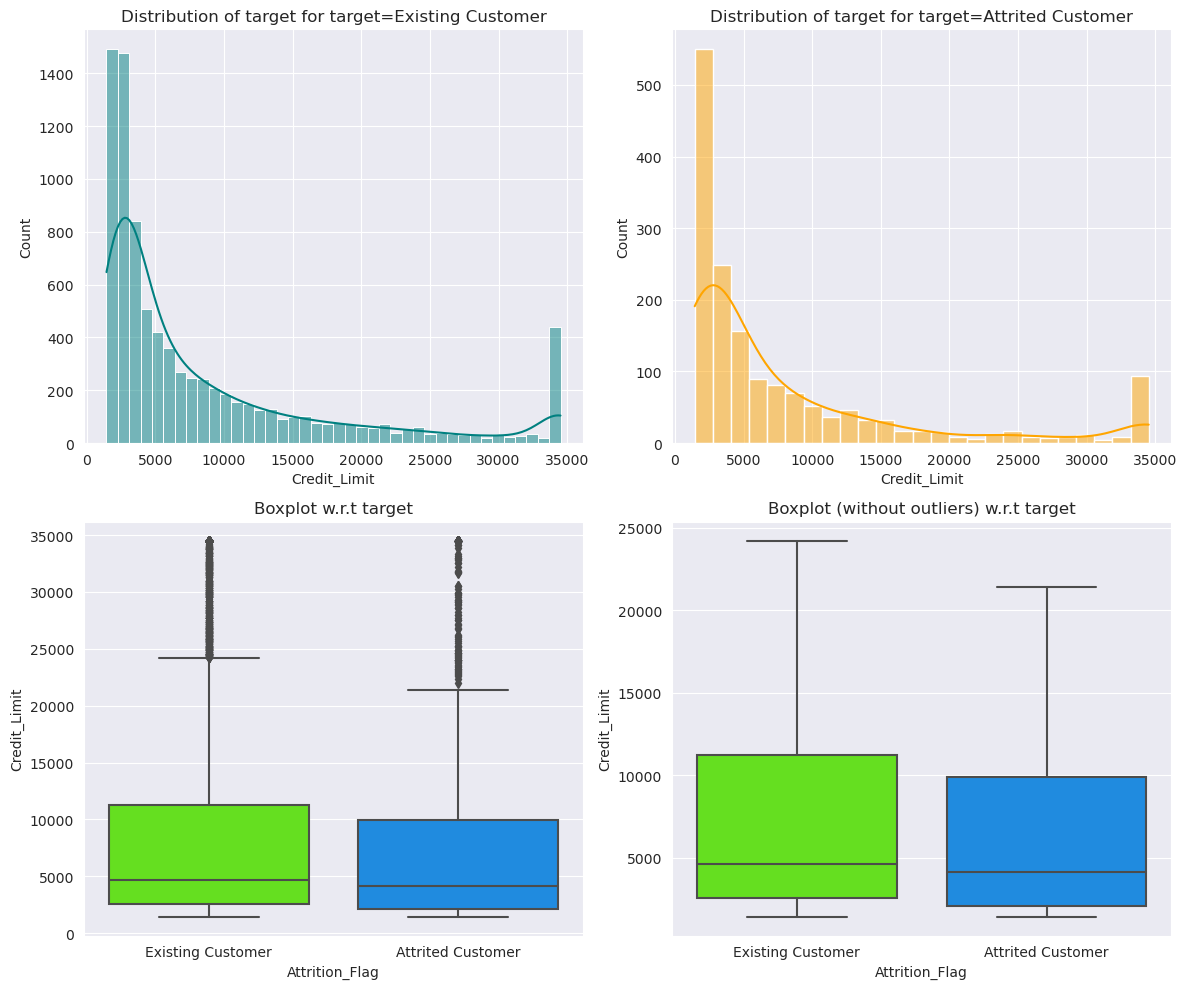

In [65]:
# visualize relationship between Attrition Flag and Credit Limit
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

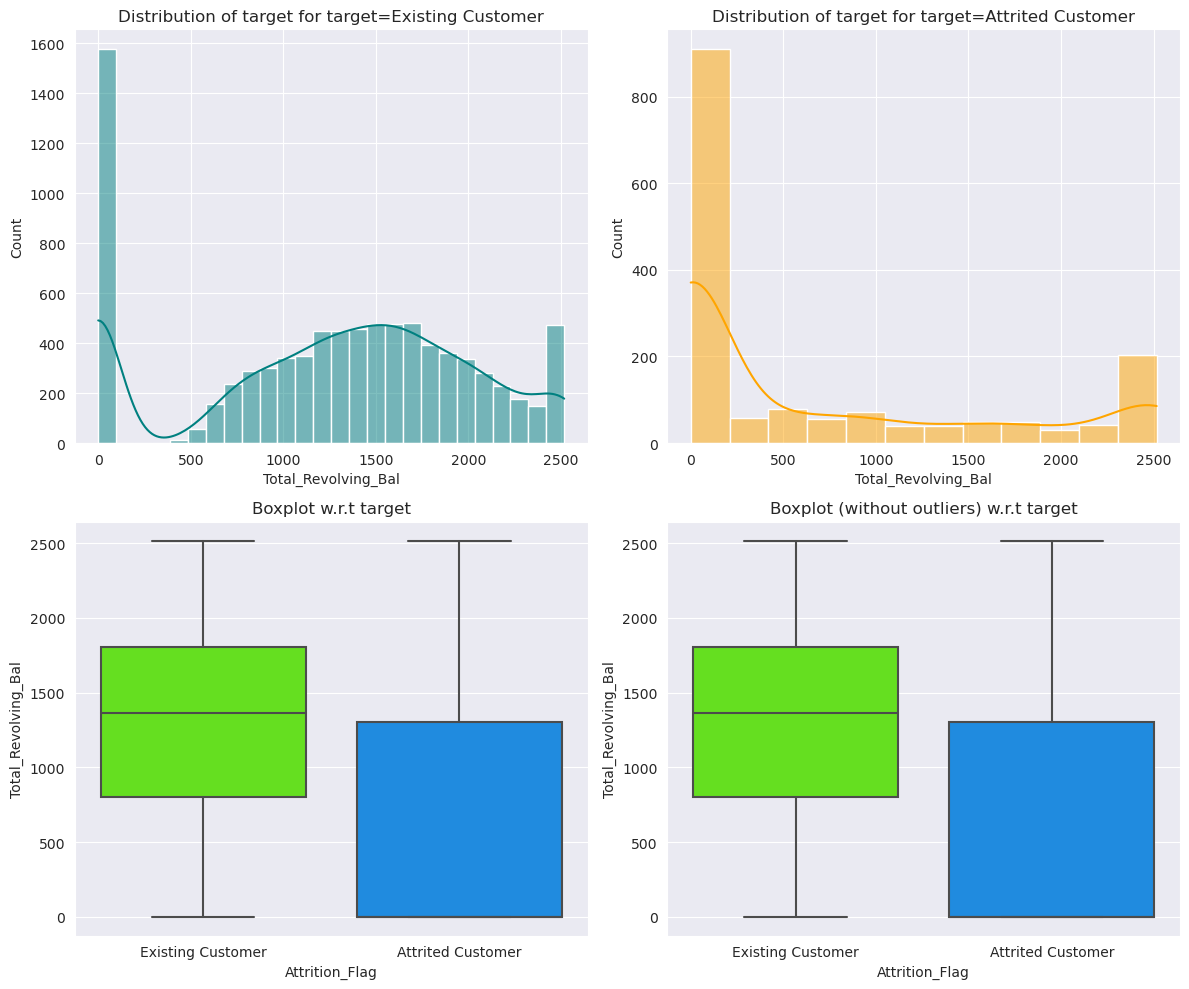

In [66]:
# visualize relationship between Attrition Flag and Total Revolving Bal
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

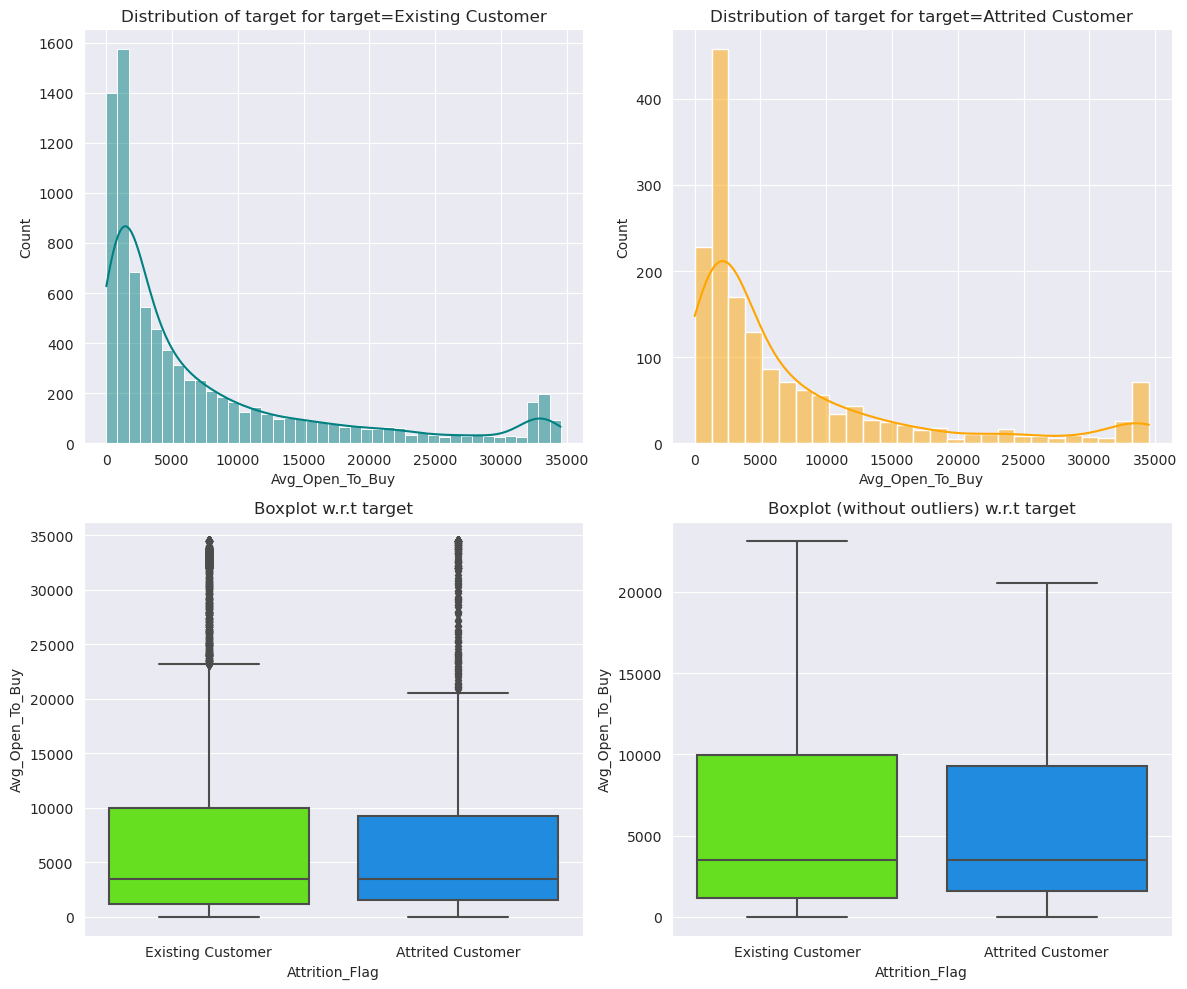

In [67]:
# visualize relationship between Attrition Flag and Avg Open To Buy
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

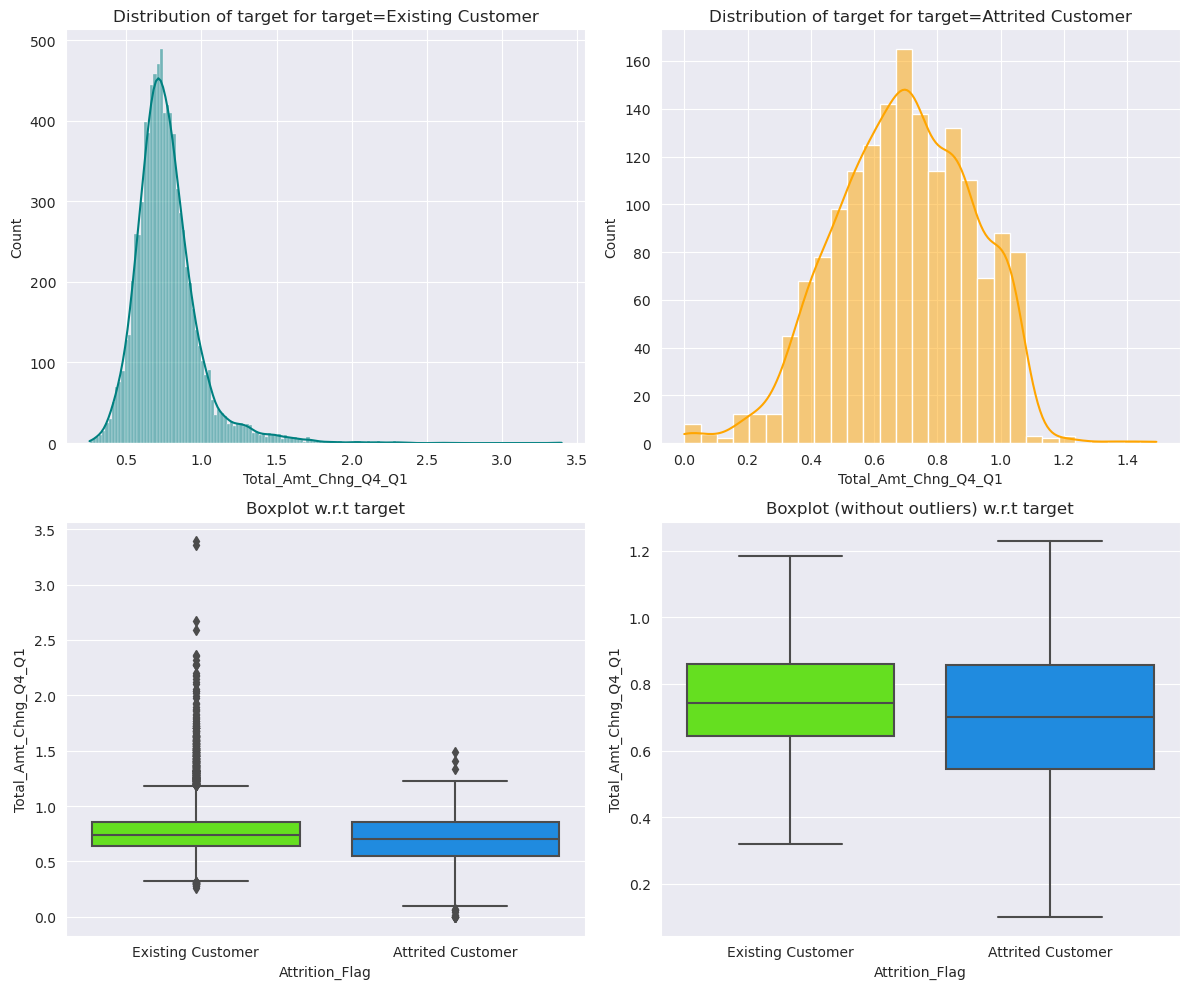

In [68]:
# visualize relationship between Attrition Flag and Total Amt Chng Q4 Q1
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

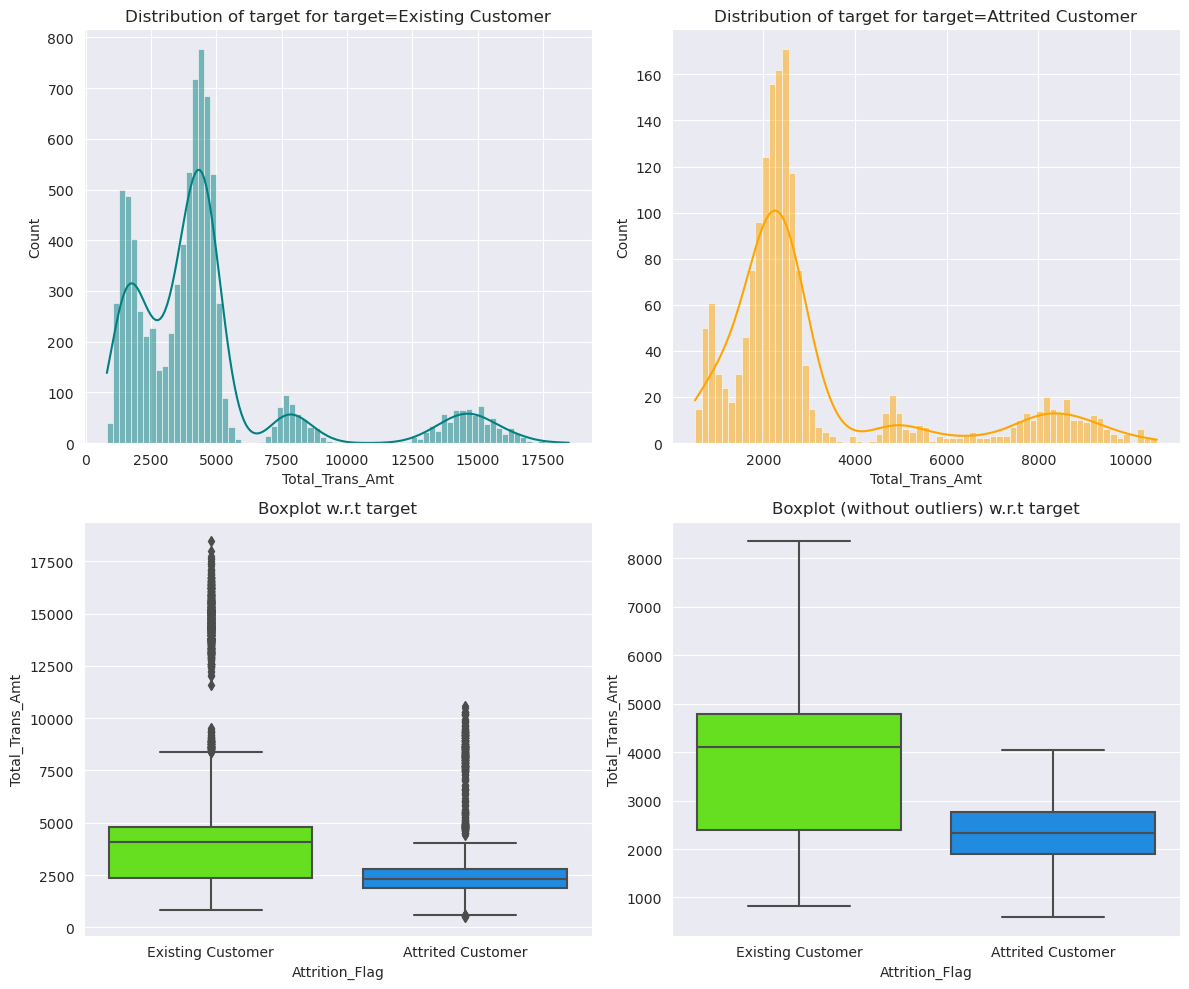

In [69]:
# visualize relationship between Attrition Flag and Total Trans Amt
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

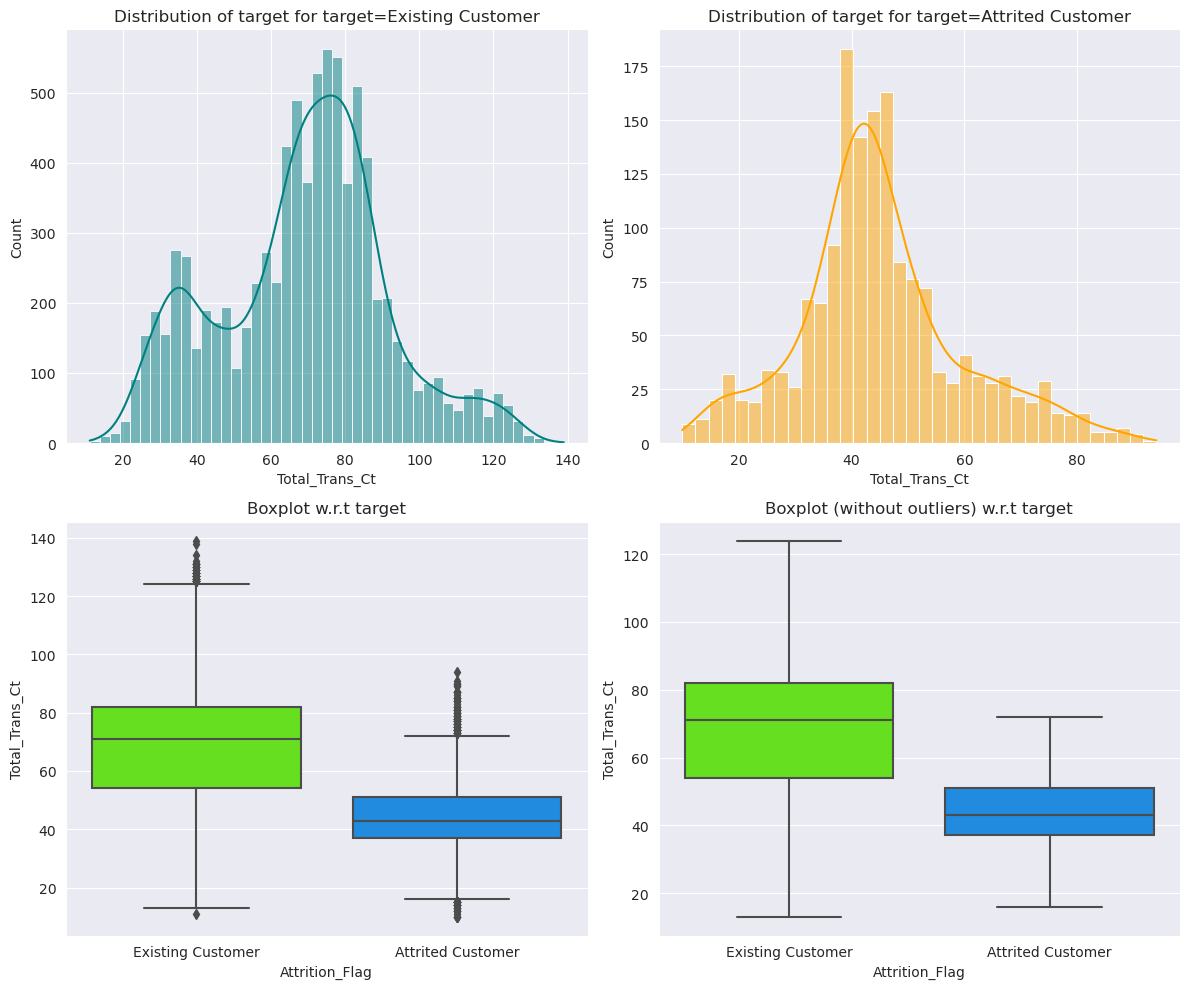

In [71]:
# visualize relationship between Attrition Flag and Total Transaction Count
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

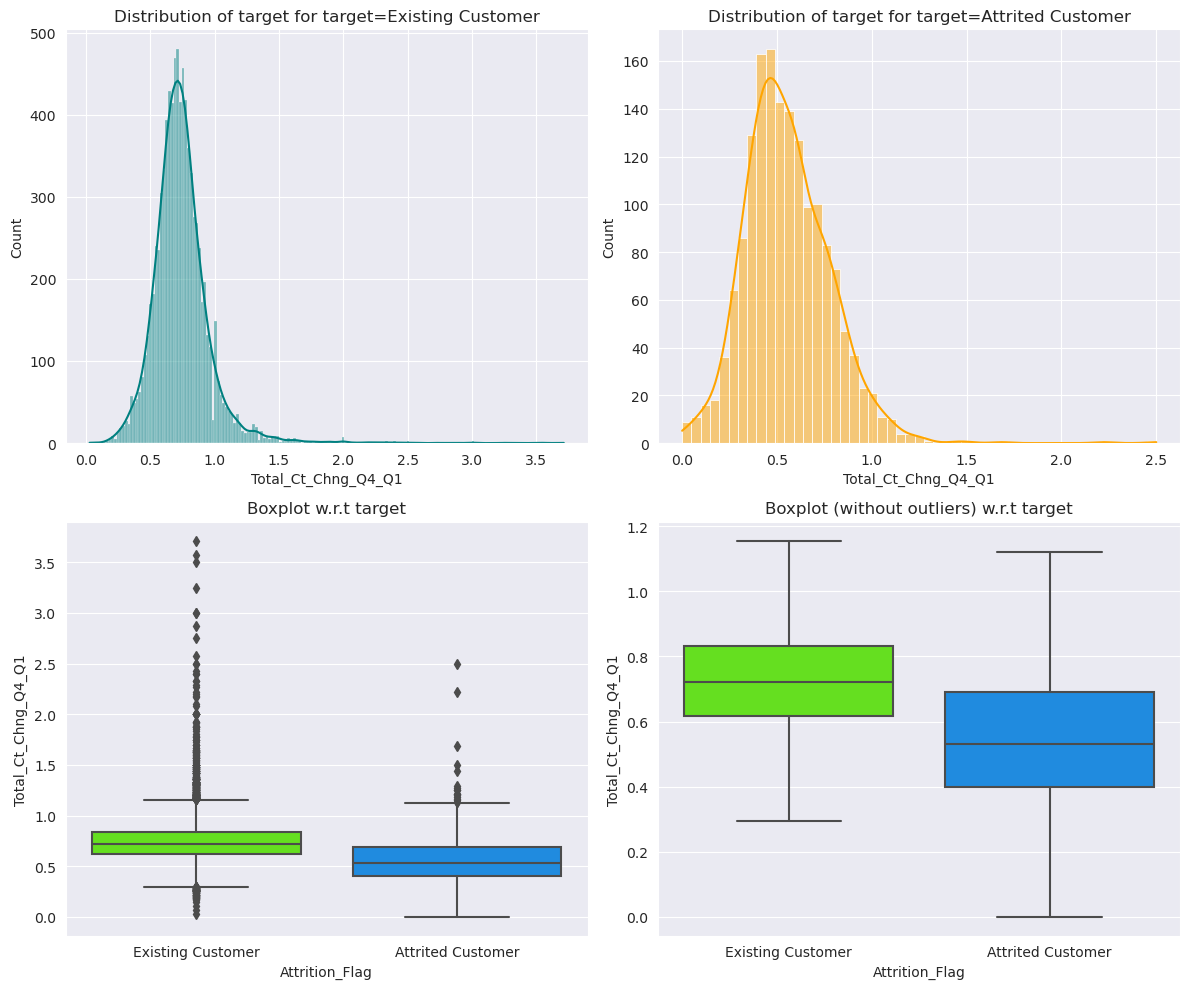

In [72]:
# visualize relationship between Attrition Flag and Total Ct Chng Q4 Q1
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

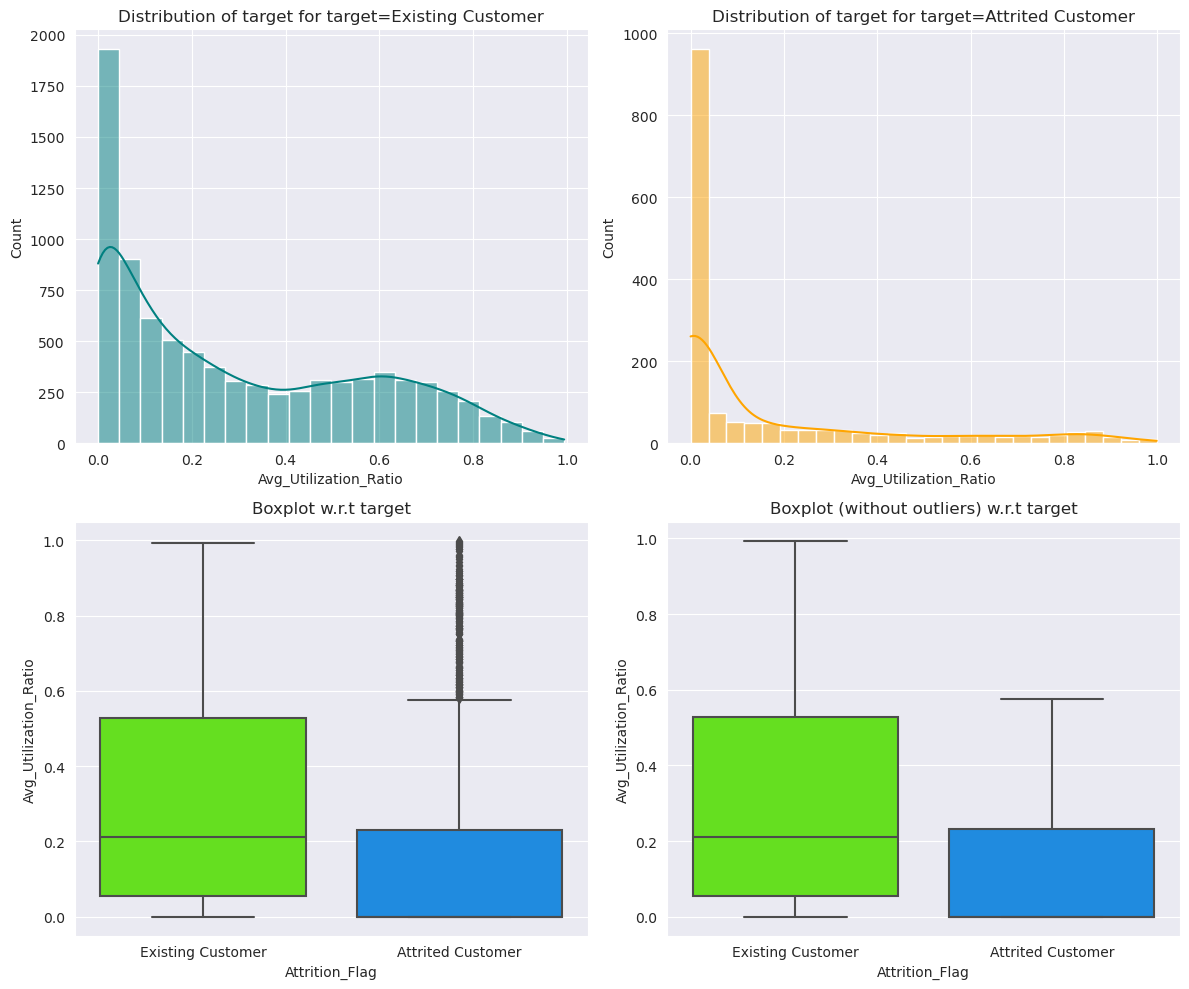

In [73]:
# visualize relationship between Attrition Flag and Avg Utilization Ratio
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

**Observations:**


1. How is the total transaction amount distributed?

Ans:

- The total transaction amount is clustered into 3 or 4 major groups, depending on how you look at it.
- Since there are 4 types of cards, it makes sense to look at the distribution by card type.

<AxesSubplot: xlabel='Total_Trans_Amt', ylabel='Card_Category'>

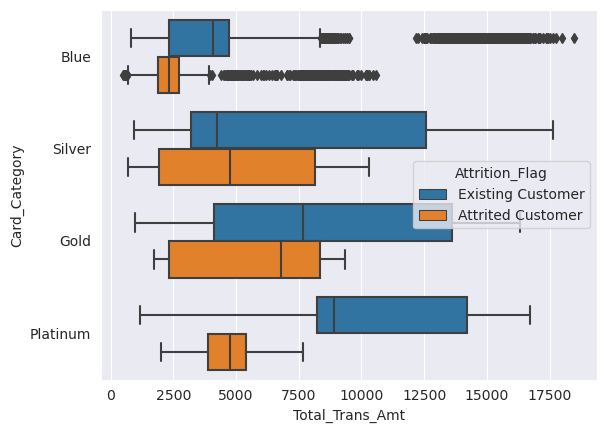

In [83]:
# visualize relationship between Total Transaction Amount and Card Category
sns.boxplot(data=df, y="Card_Category", x="Total_Trans_Amt", hue="Attrition_Flag", order=["Blue", "Silver", "Gold", "Platinum"])

- Card Type is definitely correlated with Total Transaction Amount, and that most likely is because of the different credit limit.
- Attrited Customers definitely spends _less_ than existing customers.

2. What is the distribution of the level of education of customers?

Ans:

- Most of the customers are graduates. If we assume a ranking for education level (1: Uneducated, 2: High School, 3: College, 4: Graduate, 5: Post-Graduate, 6: Doctorate), then the customers are somewhat normally distributed.

3. What is the distribution of the level of income of customers?

Ans:

- Excluding the "abc" (which we defined as unknown), most customers are in the category of less than 40K.
- If we use a ranking (basically using the income category as ranking itself), the distribution is highly skewed to the right.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

Ans:

- Existing customers has more count change than attrited customers.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

Ans:

- Most of the attrited customers have no inactive months.
- For customers with no inactive months, it is almost 50-50 between existing and attrited customers.

6. What are the attributes that have a strong correlation with each other?

Ans:

- Months on book and Customer age are highly correlated.
- Credit limit and Avg open to buy are highly correlated.
- Total transaction amount and Total transaction count are highly correlated.
- Total revolving balance and Avg utilization ratio are highly correlated.
- Income and Gender are highly correlated.
- We will need to drop one of the columns from each of the above pairs when we build the model.

## Data Pre-processing

## Missing value imputation




## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

## Model Comparison and Final Model Selection

### Test set final performance

# Business Insights and Conclusions

***